In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [3]:
df = pd.read_csv("data/Data_Science_Challenge.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


* State: The state where a customer comes from (categorical data)
* Account length: Number of days a customer has been using services
* Area code: The area where a customer comes from (location data)
* Phone number: The phone number of a customer
* International plan: The status of customer international plan (cat/binary variable)
* Voicemail plan: The status of customer voicemail plan (cat/binary variable)
* No. vmail msgs: Number of voicemail message sent by a customer
* Total day minutes: Total call minutes spent by a customer during day time
* Total day calls: Total number of calls made by a customer during day time
* Total day charge: Total amount charged to a customer during day time
* Total eve minutes: Total call minutes spent by a customer during evening time
* Total eve calls: Total number of calls made by a customer during evening time
* Total eve charge: Total amount charged to a customer during evening time
* Total night minutes: Total call minutes spent by a customer during night time
* Total night calls: Total number of calls made by a customer during night time
* Total night charge: Total amount charged to a customer during night time
* Total intl minutes: Total international call minutes spent by a customer
* Total intl calls: Total number of international calls made by a customer
* Total int charge: Total international call amount charged to a customer
* Customer service calls: Total number of customer service calls made by a customer
* Churn: Whether a customer is churned or not (target variable)

## High level view of the data

check shape, data type, missing_values, duplicate values, summary statistics, class balance

In [4]:
df.shape

(3333, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [10]:
df.describe(include='object')

,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,382-4657,no,no
freq,106,1,3010,2411


### Outlier Detection

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'account length'),
  Text(1, 0, 'area code'),
  Text(2, 0, 'number vmail messages'),
  Text(3, 0, 'total day calls'),
  Text(4, 0, 'total eve calls'),
  Text(5, 0, 'total night calls'),
  Text(6, 0, 'total intl calls'),
  Text(7, 0, 'customer service calls')])

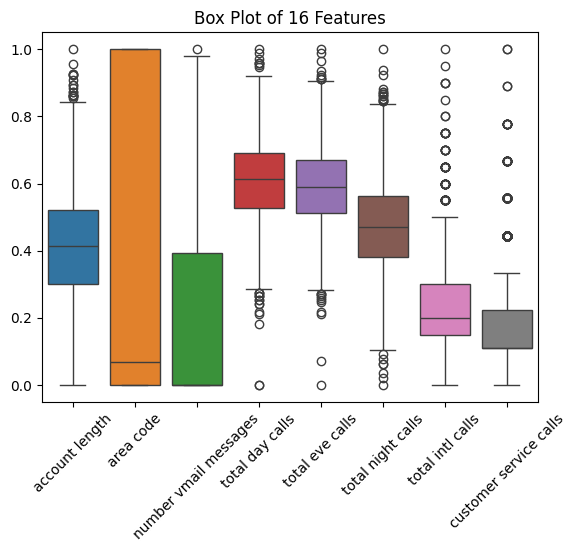

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

normalized_df = pd.DataFrame(scaler.fit_transform(df.select_dtypes(include='int')), columns=df.select_dtypes(include='int').columns)
sns.boxplot(normalized_df)

# Add labels and title
plt.title('Box Plot of 16 Features')
plt.xticks(rotation=45)

In [30]:
def detect_outlier(df: pd.DataFrame):
    outlier_count = {}
    for column in df.select_dtypes(include="number"):
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        
        lower_bound = q1 - 1.5*iqr 
        upper_bound = q3 + 1.5*iqr
        
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_count[column] = outliers.shape[0]
    return outlier_count


# Detect outliers
outliers = detect_outlier(df)
df_outlier = pd.DataFrame(list(outliers.items()), columns=['Column', 'Number of Outliers'])
df_outlier
        

,Column,Number of Outliers
0,account length,18
1,area code,0
2,number vmail messages,1
3,total day minutes,25
4,total day calls,23
5,total day charge,25
6,total eve minutes,24
7,total eve calls,20
8,total eve charge,24
9,total night minutes,30


## Class Balance

In [33]:
df_class = df['churn'].value_counts(normalize=True)
print("Class Balance in dataframe (as percentages):")
print(df_class)

Class Balance in dataframe (as percentages):
churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64


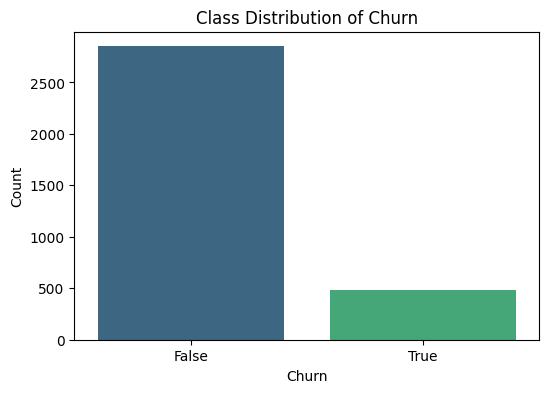

In [36]:
# Plot of Class Balance

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="churn", palette='viridis')
plt.title('Class Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

*observations*:
1. 3333 unique observations (20 features, 1 target variable)
2. None of the columns have any missing data
3. The Data Types currently make sense except for area code.
4. Majority of columns have outliers
5. We have highly imbalanced dataset: 85.5%

*Conclusion*:
* This is a classification problem.
* Use model evaluation criteria other than accuracy. Metrics like precision, recall, F1-score, ROC-AUC curve will become important.
* If identifying churned customers is important, make sure we perform oversampling/undersampling so that our model learns the minority class as well. Not doing this will lead to our model getting biased towards majority class.

# Data Preprocessing

* Handling Missing Data: **NOT** Required
* Handling Duplicate Data: **NOT** Required
* Correct Data Types
* Drop features if required

## Correct Data Type

In [42]:
# Correct Data Type of area code
df['area code'] = df['area code'].astype('object')
df.describe(include='object')

,state,area code,phone number,international plan,voice mail plan
count,3333,3333,3333,3333,3333
unique,51,3,3333,2,2
top,WV,415,382-4657,no,no
freq,106,1655,1,3010,2411


## Drop uneeded features
Phone number of a client is unlikely to determine if they would churn or not

In [44]:
df = df.drop("phone number", axis=1)
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# EDA

* Univariate analysis of numerical and categorical features.
* Multi-variate analysis to learn any correlations between features.
* Explore the relationships between features and the target variable (Churn).


In [50]:
df.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64'), dtype('bool')],
      dtype=object)

## Numerical features Distribution

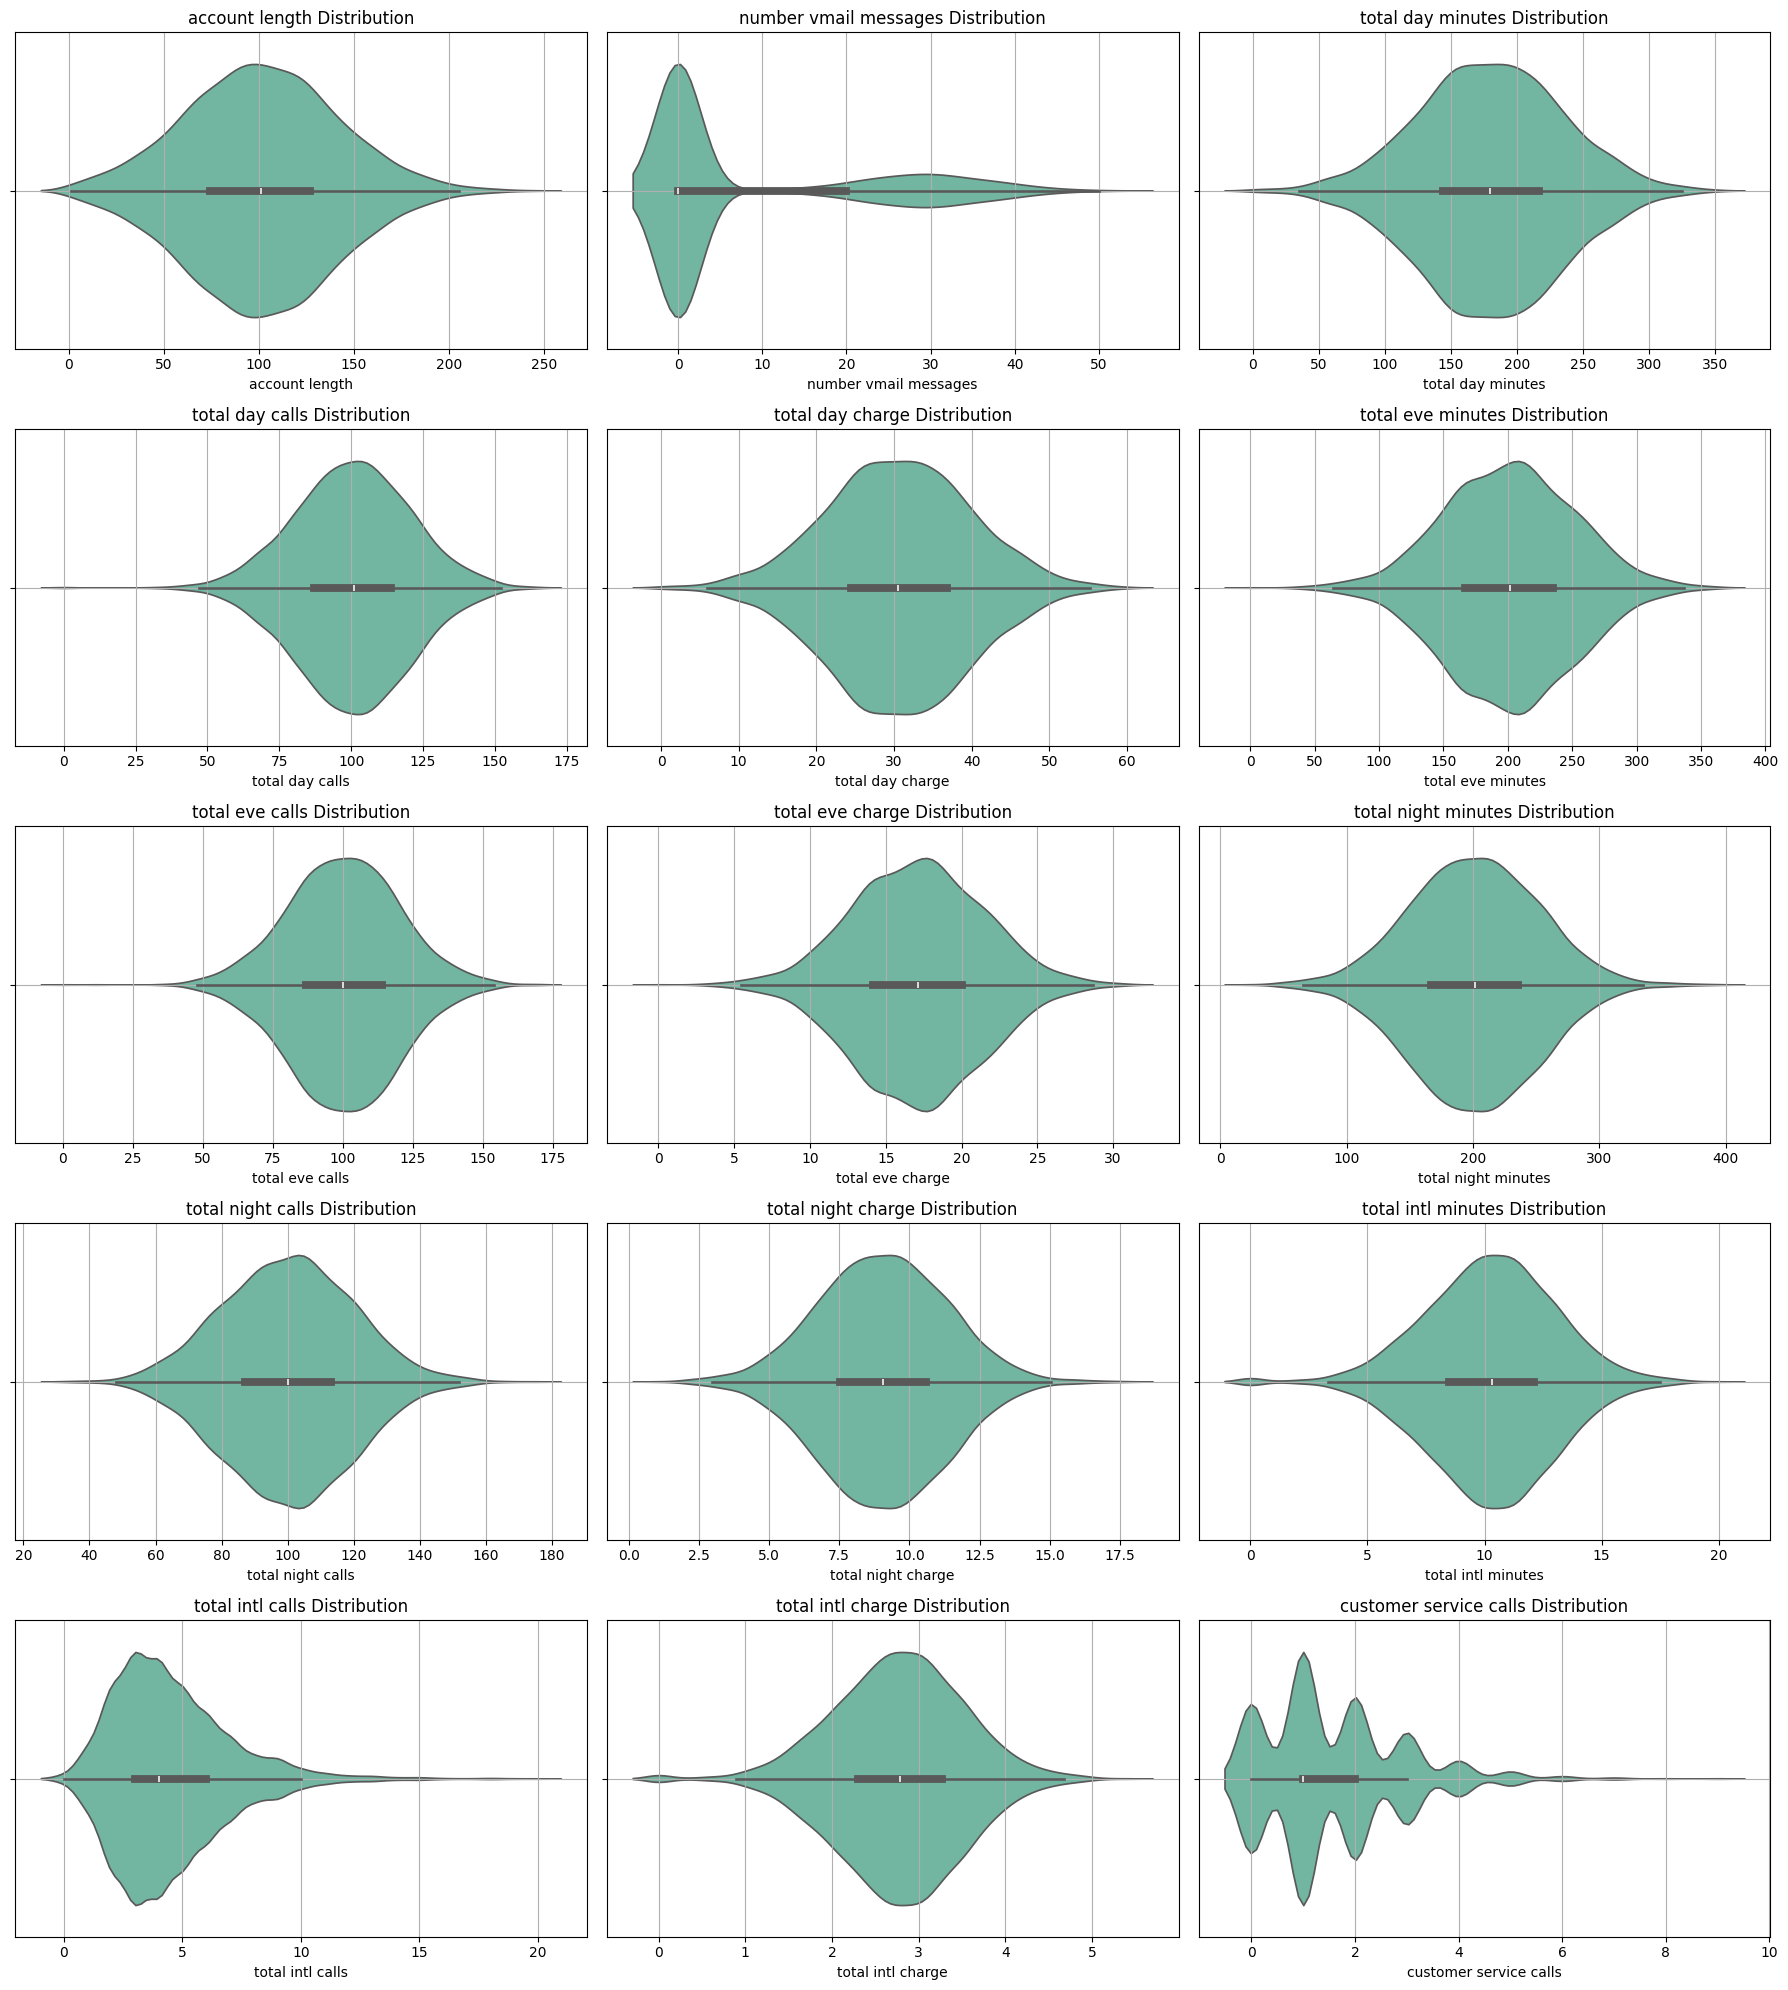

In [55]:
numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns

fig, axes = plt.subplots(nrows=len(numerical_columns)//3, ncols=3, figsize=(18,20))

palette = sns.color_palette("Set2")

for idx, column in enumerate(numerical_columns):
    row, col = divmod(idx, 3)
    sns.violinplot(data=df, x=column, ax=axes[row, col], palette=palette)
    axes[row, col].set_title(f"{column} Distribution")
    axes[row, col].grid(True)


    
plt.tight_layout()
plt.show()


**Observations:**

From the looks of it, three features doesn't seem to follow a normal distribution
* number vmail messages
* total intl calls
* customer service calls

We can leave then as is however, we wouldn't be able to apply a non-Tree based model. OR Apply transformations so those models can be used

## Categorical feature distribution

'state' Done seprately for visual purposes

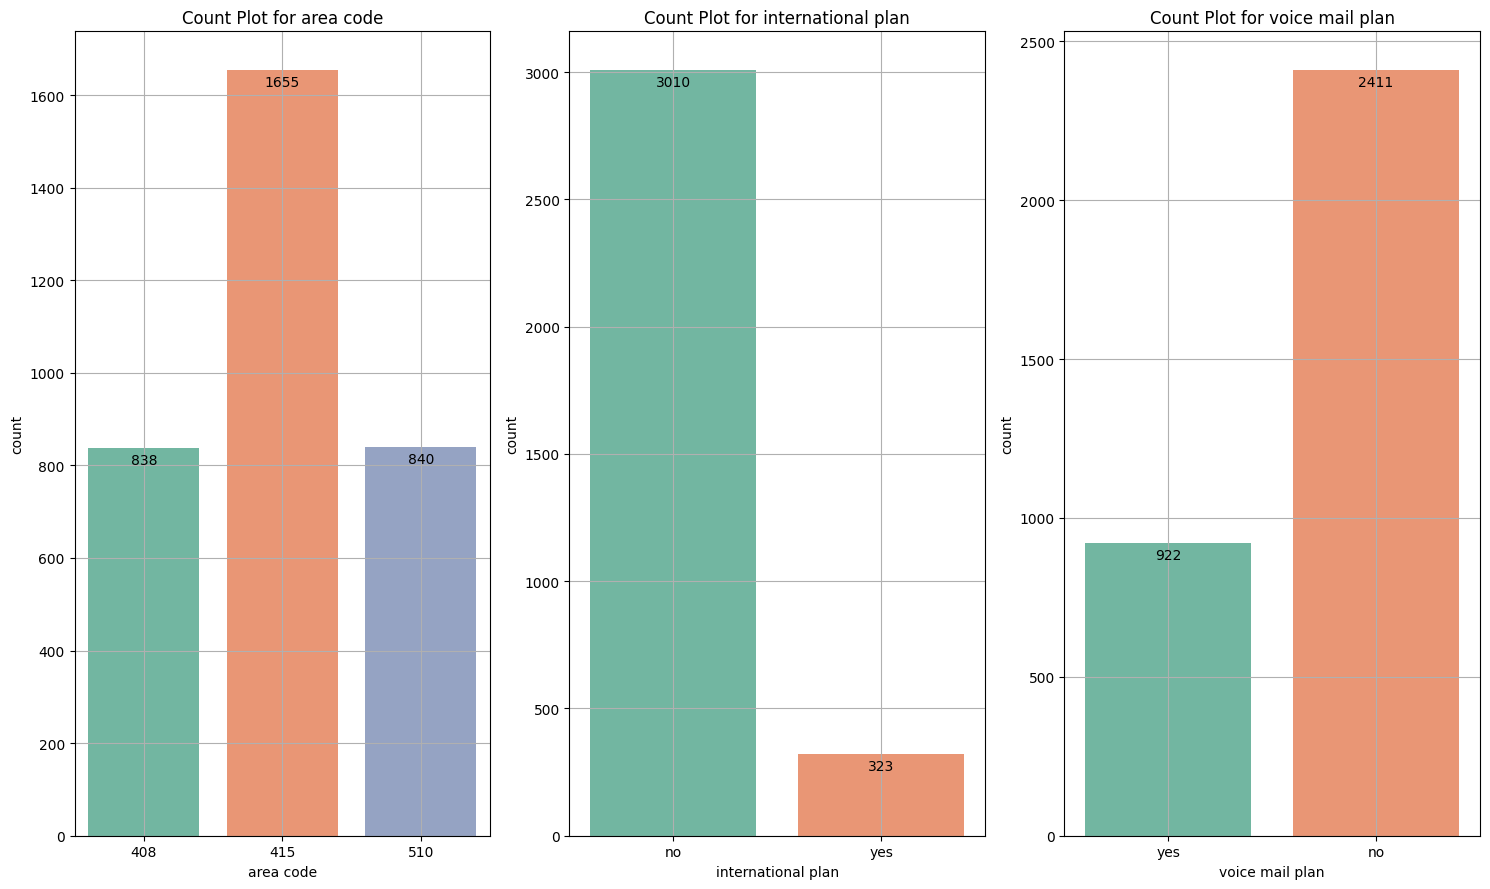

In [65]:
categorical_features = df.select_dtypes("object").columns
categorical_features = categorical_features.drop('state')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,9))
palette = sns.color_palette("Set2")

for idx, column in enumerate(categorical_features):
    plot = sns.countplot(data=df, x=column, ax=axes[idx], palette=palette)

    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, -9), textcoords = 'offset points')
    
    axes[idx].set_title(f"Count Plot for {column}")
    axes[idx].grid(True)


    
plt.tight_layout()
plt.show()